In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# This imports the HTML class from the IPython.display module.
# HTML allows us to insert raw HTML and CSS directly into a Jupyter Notebook.
from IPython.display import HTML

HTML("""  
<style>
/* Custom styles for all markdown headers except the project name */
.custom-header {
    margin: 0.5em 0 0.2em 0;  /* Reduce top & bottom space */
    font-weight: 600;  
    font-family: 'Titillium Web', sans-serif;  
    position: relative;  
    font-size: 28px;  /* Reduce font size */
    line-height: 32px;  /* Adjust line spacing */
    padding: 8px 10px 8px 1.5%;  /* Reduce inner padding */
    color: #13003A;  
   
    /* Reduce box-shadow effect */
    box-shadow: 
        inset 0 0 0 1px rgba(53,86,129, 1),  
        inset 0 0 3px rgba(53,86,129, 1),
        inset -150px 0 20px white;  

    border-radius: 0 5px 0 8px;  /* Slightly rounded corners */
    background: #fff;  
}
</style>
""")


<h1 class="custom-header"> Loading match and deliveries dataset:</h1>

In [35]:
dele_df = pd.read_csv("C:/Users/UB/DataScience/internship_infotact/deliveries.csv", encoding = 'unicode_escape')
matches_df = pd.read_csv("C:/Users/UB/DataScience/internship_infotact/matches.csv", encoding = 'unicode_escape')
#to avoid encoding error,use uncode escape

<h1 class="custom-header">Analyze the data set</h1>

In [36]:
dele_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [37]:
matches_df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


<h1 class="custom-header">Data Cleaning</h1>

In [38]:
matches_df.shape

(1095, 20)

In [39]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [40]:
#display the numerical columns information
matches_df.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


In [41]:
# city with most matches won
matches_df.groupby(["city"]).agg({"winner":["count"]}).max()

winner  count    173
dtype: int64

In [42]:
matches_df.groupby(["city"]).agg({"winner":["count"]}).sort_values(ascending=False,by=("winner","count")).head(1)

,winner
,count
city,
Mumbai,173


In [43]:
# team that won most matches
matches_df["winner"].value_counts().head(1)

winner
Mumbai Indians    144
Name: count, dtype: int64

In [44]:
# player who won most of man of the match awards
matches_df["player_of_match"].value_counts().head(1)

player_of_match
AB de Villiers    25
Name: count, dtype: int64

In [45]:
# most frequent umpire 1
matches_df["umpire1"].value_counts().head(1)

umpire1
AK Chaudhary    115
Name: count, dtype: int64

In [46]:
# most frequent umpire 2

matches_df["umpire2"].value_counts().head(1)

umpire2
S Ravi    83
Name: count, dtype: int64

In [47]:
# who won the most of the toss
matches_df.groupby(["toss_winner"]).agg({"winner":["count"]}).sort_values(ascending=False,by=("winner","count")).head(1)

,winner
,count
toss_winner,
Mumbai Indians,143


<Axes: xlabel='winner'>

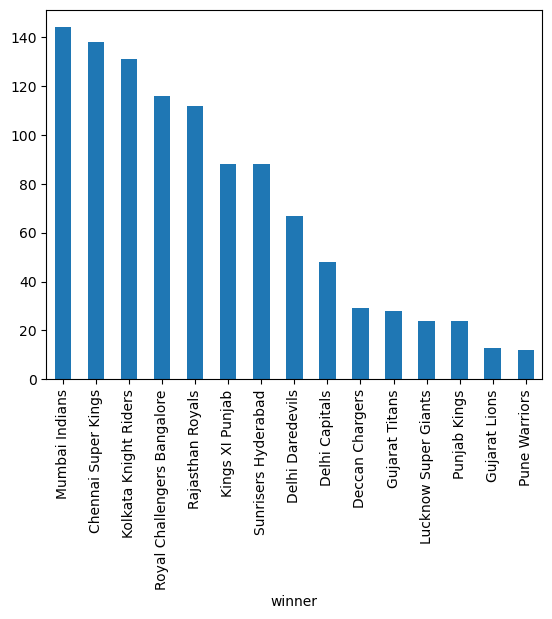

In [48]:
#winner list
matches_df["winner"].value_counts().head(15).plot(kind="bar")

In [49]:
#no.of match played in the each season
match_per_season=matches_df.groupby(['season'])['id'].count().reset_index().rename(columns={'id':'matches'})
match_per_season.style.background_gradient(cmap='PuBu')

,season,matches
0,2007/08,58
1,2009,57
2,2009/10,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


In [50]:
#winner list with unque name
matches_df.winner.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

<Axes: xlabel='player_of_match'>

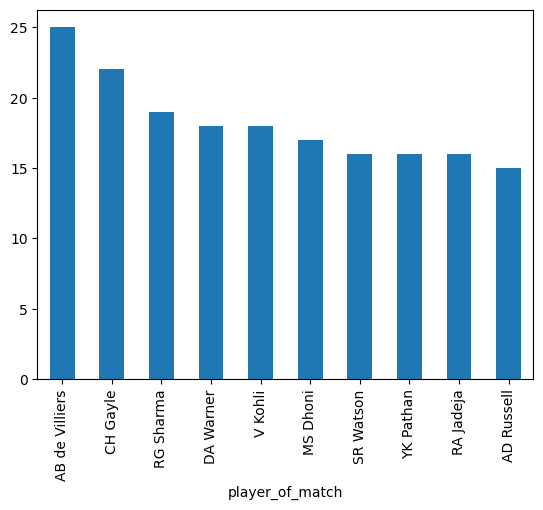

In [51]:
#toss winner
matches_df["player_of_match"].value_counts().head(10).plot(kind="bar")

In [52]:
dele_df.shape

(260920, 17)

In [53]:
matches_df=matches_df.rename(columns={"id":"match_id"})

In [54]:
dele_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [55]:
#find the sum of missing value
dele_df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [56]:
#drop the missing values
dele_df.drop(['extras_type', 'player_dismissed', 'dismissal_kind', 'fielder'],axis=1 , inplace=True)

In [57]:
dele_df.shape

(260920, 13)

In [58]:
#merge  the two tables
df=pd.merge(matches_df,dele_df,on="match_id",how="left")
df

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,is_wicket
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,0
1,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,0
2,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,0
3,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,0
4,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,0
260916,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,0
260917,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,0
260918,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,0


In [59]:
df.columns

Index(['match_id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker',
       'batsman_runs', 'extra_runs', 'total_runs', 'is_wicket'],
      dtype='object')

In [60]:
#finding the missing value
df.isnull().sum()

match_id                0
season                  0
city                12397
date                    0
match_type              0
player_of_match       490
venue                   0
team1                   0
team2                   0
toss_winner             0
toss_decision           0
winner                490
result                  0
result_margin        4124
target_runs           309
target_overs          309
super_over              0
method             257274
umpire1                 0
umpire2                 0
inning                  0
batting_team            0
bowling_team            0
over                    0
ball                    0
batter                  0
bowler                  0
non_striker             0
batsman_runs            0
extra_runs              0
total_runs              0
is_wicket               0
dtype: int64

In [61]:
df.shape

(260920, 32)

In [62]:
df.dropna(how="all",axis=1).head()

,match_id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,is_wicket
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,0
1,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,0
2,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,0
3,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,0
4,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,0


<h1 class="custom-header">Total matches played in each season</h1>

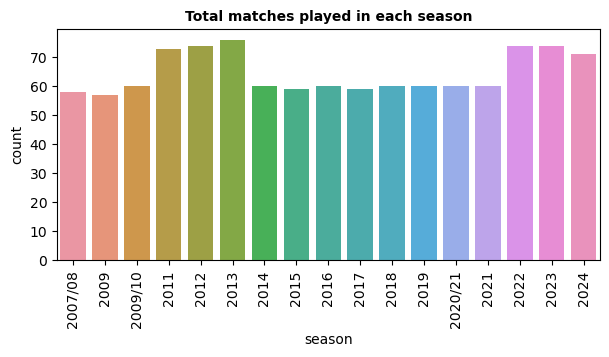

In [63]:
plt.subplots(figsize=(7, 3))
sns.countplot(x="season",data=matches_df)
plt.xticks(rotation=90)
plt.title('Total matches played in each season', fontsize = 10, fontweight = "bold")
plt.show()

<h1 class="custom-header">Number of matches playes in each stadium</h1>

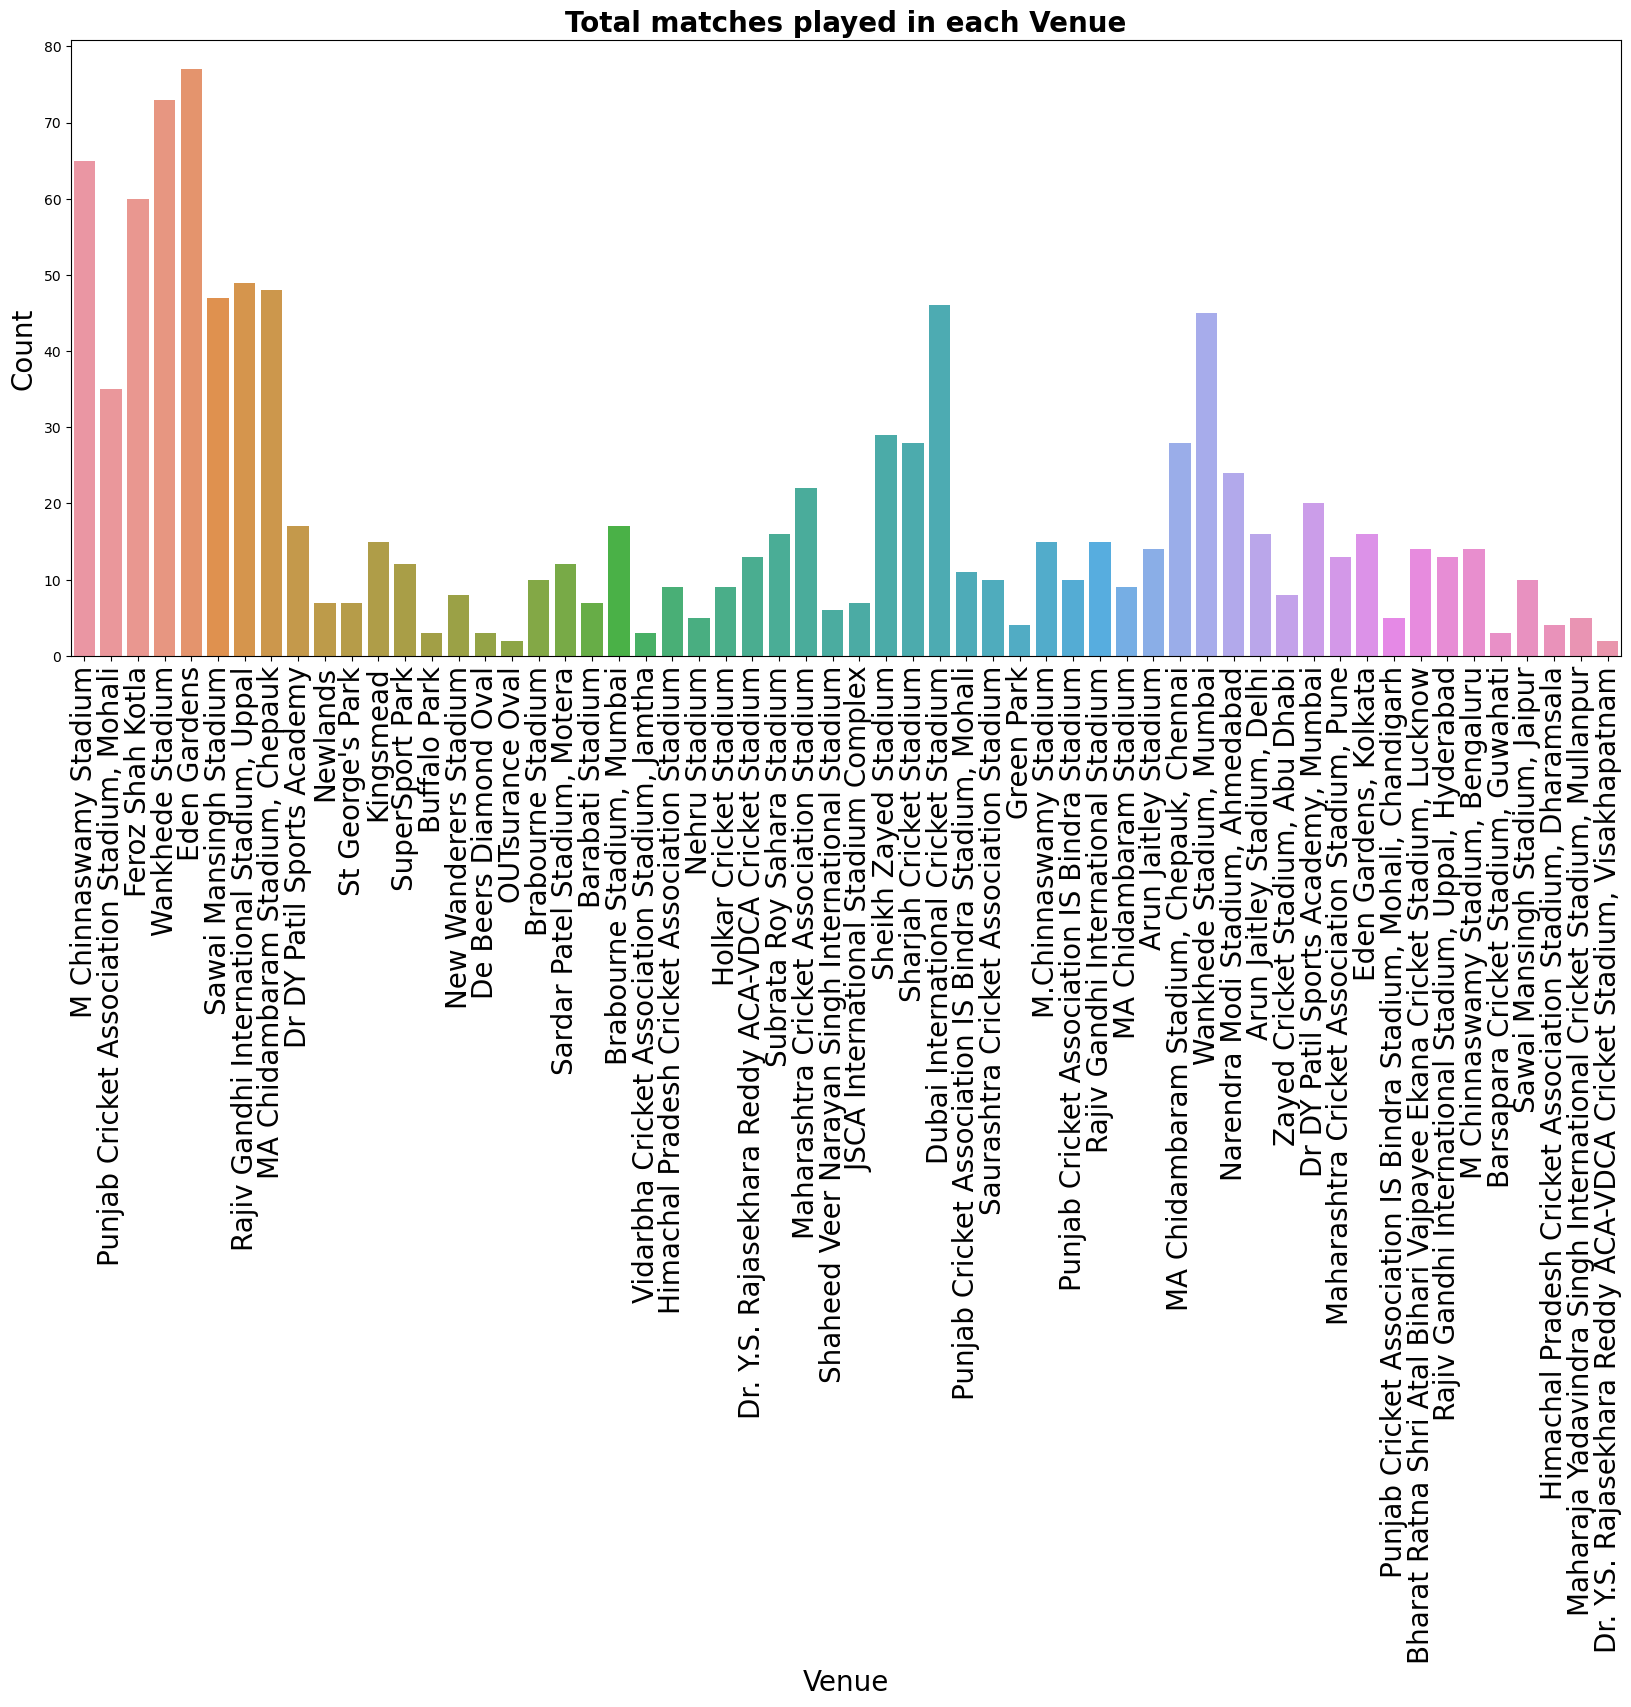

In [64]:
plt.subplots(figsize=(20, 8))
sns.countplot(x="venue",data=matches_df)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=10)
plt.xlabel('Venue', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Total matches played in each Venue', fontsize = 20, fontweight = "bold")
plt.show()

<h1 class="custom-header">Total run in each  IPL season</h1>

C:\Users\UB\AppData\Local\Temp\ipykernel_2136\1470617397.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=season,palette="magma")
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


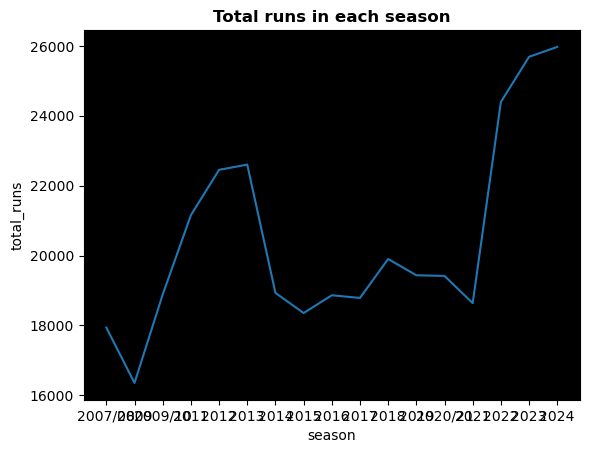

In [72]:
season=df.groupby(['season'])['total_runs'].sum()
ax = plt.axes()
ax.set(facecolor = "black")
sns.lineplot(data=season,palette="magma") 
plt.title('Total runs in each season',fontsize=12,fontweight="bold")
plt.show()

<h1 class="custom-header">maximum toss won</h1>

In [66]:
matches_df["toss_winner"].value_counts().head(10)

toss_winner
Mumbai Indians                 143
Kolkata Knight Riders          122
Chennai Super Kings            122
Rajasthan Royals               120
Royal Challengers Bangalore    113
Sunrisers Hyderabad             88
Kings XI Punjab                 85
Delhi Daredevils                80
Delhi Capitals                  50
Deccan Chargers                 43
Name: count, dtype: int64

<h1 class="custom-header">won the toss and win the match</h1>

In [67]:
k=matches_df.toss_decision[ matches_df.toss_winner==matches_df.winner]
k

1         bat
8       field
10      field
12      field
14        bat
        ...  
1072    field
1073      bat
1075    field
1078    field
1092    field
Name: toss_decision, Length: 554, dtype: object

In [68]:
toss_winner_match_winner = matches_df[matches_df["toss_winner"] == matches_df["winner"]].shape[0]

# Total number of matches
total_matches = matches_df.shape[0]

# Calculate percentage
toss_win_percentage = (toss_winner_match_winner / total_matches) * 100


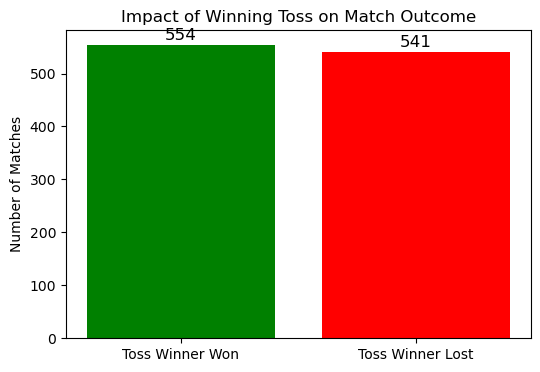

In [69]:

# Count matches where toss winner lost
toss_winner_match_loser = total_matches - toss_winner_match_winner

# Data for visualization
labels = ["Toss Winner Won", "Toss Winner Lost"]
values = [toss_winner_match_winner, toss_winner_match_loser]

# Plot the bar chart
plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=['green', 'red'])

# Add labels and title
plt.ylabel("Number of Matches")
plt.title("Impact of Winning Toss on Match Outcome")

# Display the values on bars
for i, v in enumerate(values):
    plt.text(i, v + 10, str(v), ha='center', fontsize=12)

# Show the plot
plt.show()


<h1 class="custom-header">Find the batsman with the most sixes and fours</h1>

In [70]:
max_six_four = dele_df[(dele_df['batsman_runs']== 4) | (dele_df['batsman_runs']==6)].groupby(['batter']).sum()[['batsman_runs']]
max_six_four = max_six_four.sort_values('batsman_runs', ascending=False)[:10]

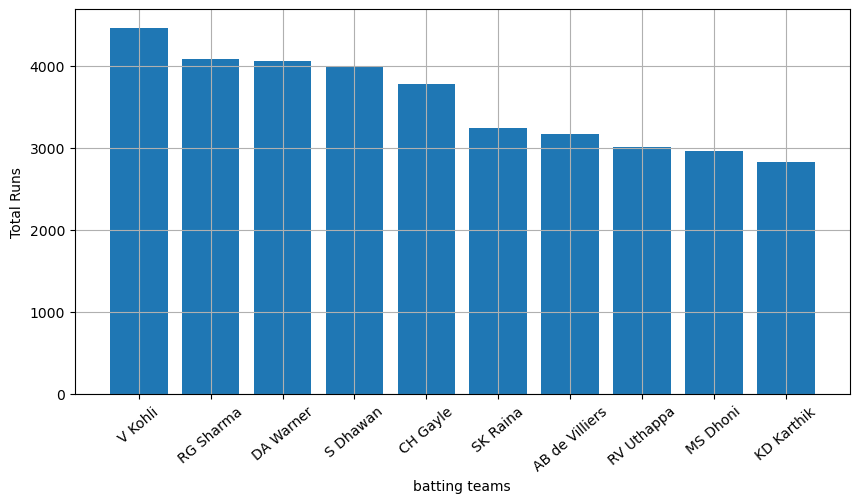

In [71]:
plt.figure(figsize=(10, 5))
plt.grid(True)
plt.bar(max_six_four.index, max_six_four['batsman_runs'])
plt.xticks(rotation= 40)
plt.xlabel('batting teams')
plt.ylabel('Total Runs')
plt.show()

<h1 class="custom-header"> MI Win Rate in different stadium</h1>

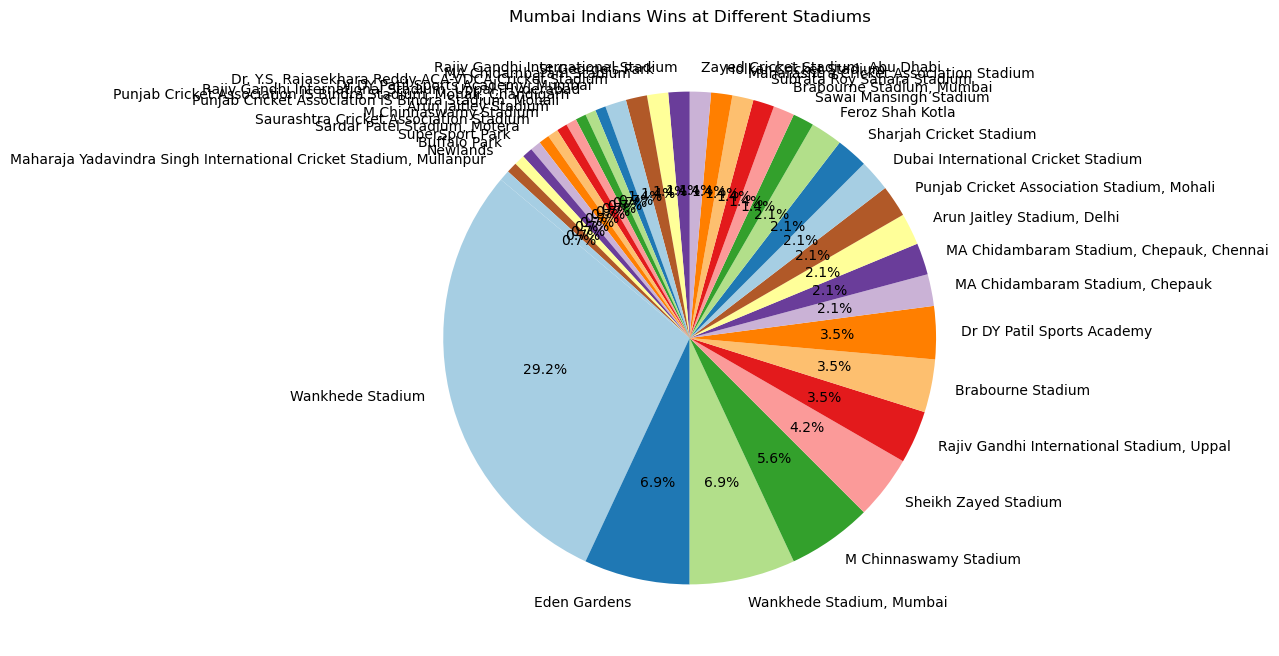

In [67]:
# Filter matches won by Mumbai Indians
mi_wins = matches_df[matches_df["winner"] == "Mumbai Indians"]

# Count wins per stadium
mi_wins_by_venue = mi_wins["venue"].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(mi_wins_by_venue, labels=mi_wins_by_venue.index, autopct='%1.1f%%', startangle=140, 
        colors=plt.cm.Paired.colors)  # Corrected color handling
# Add title
plt.title("Mumbai Indians Wins at Different Stadiums")

# Show the plot
plt.show()